In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
import numba

%matplotlib inline

In [2]:
# Set parameters
β = 0.96
b = 0.05
μ = 0.0
σ = 0.15

In [3]:
'''
------------------------------------------------------------------------
Create Grid for Wage State Space    
------------------------------------------------------------------------
lb_w      = scalar, lower bound of wage grid
ub_w      = scalar, upper bound of wage grid 
size_w    = integer, number of grid points in wage state space
w_grid    = vector, size_w x 1 vector of wage grid points 
------------------------------------------------------------------------
'''
lb_w = 0.1 # lower bound wage 
ub_w = 2.0 # upper bound wage
size_w = 1000  # Number of grid points
w_grid = np.linspace(lb_w, ub_w, size_w)
w_dist = lognorm(s=σ, loc=μ) # distribution of wages
w_prob = np.zeros(size_w)
for i in range(1, size_w):
    w_prob[i] = w_dist.cdf(w_grid[i]) - w_dist.cdf(w_grid[i-1])

In [4]:
'''
------------------------------------------------------------------------
Value Function Iteration to find Reservation Wage    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = matrix, the value functions at each iteration
TV          = matrix, the value function after applying the Bellman operator
VFiter      = integer, current iteration number
------------------------------------------------------------------------
'''
@numba.jit
def reservation_wage(b, β, w_prob, w_grid):
    VFtol = 1e-8 
    VFdist = 100
    VFmaxiter = 500 
    V = w_grid / (1 - β) # initial guess at value function
    TV = np.empty_like(V)
    VFiter = 1
    while VFdist > VFtol and VFiter < VFmaxiter:
        for i in range(size_w): # loop over w
            v_employed = w_grid[i] / (1 - β)
            v_unemployed = b + β * np.sum(V * w_prob)
            TV[i] = max(v_employed, v_unemployed)
        VFdist = (np.absolute(V - TV)).max()  # check distance
        V[:] = TV
        VFiter += 1
    return V, (1 - β) * (b + β * np.sum(V * w_prob))

In [5]:
VF, res_wage = reservation_wage(b, β, w_prob, w_grid)
res_wage

1.0570480921072598

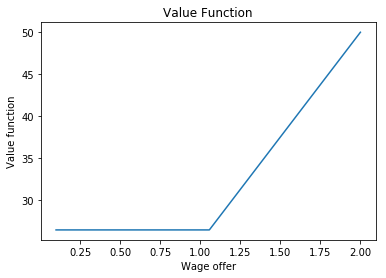

In [6]:
plt.plot(w_grid, VF)
plt.title("Value Function")
plt.xlabel("Wage offer")
plt.ylabel("Value function")
plt.show()

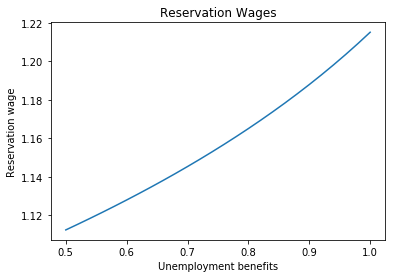

In [7]:
b_vals = np.arange(0.5, 1.02, 0.02)
res_wages = np.empty_like(b_vals)
for i, b_i in enumerate(b_vals):
    VF, res_wages[i] = reservation_wage(b_i, β, w_prob, w_grid)

plt.plot(b_vals, res_wages)
plt.title("Reservation Wages")
plt.xlabel("Unemployment benefits")
plt.ylabel("Reservation wage")
plt.show()